In [43]:
%run main.py
%run EDAmain.py

In [44]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cinsiyet                      7043 non-null   object 
 1   65 Yaş Üstü                   7043 non-null   object 
 2   Medeni Durum                  7043 non-null   object 
 3   Bakma Sorumluluğu             7043 non-null   object 
 4   Müşteri Olma Süresi(Ay)       7043 non-null   int64  
 5   Ev Telefonu Aboneliği         7043 non-null   object 
 6   Birden Fazla Abonelik Durumu  7043 non-null   object 
 7   İnternet Aboneliği            7043 non-null   object 
 8   Güvenlik Hizmeti Aboneliği    7043 non-null   object 
 9   Yedekleme Hizmeti Aboneliği   7043 non-null   object 
 10  Ekipman Güvenlik Aboneliği    7043 non-null   object 
 11  Teknik Destek Aboneliği       7043 non-null   object 
 12  IP Tv Aboneliği               7043 non-null   object 
 13  Fil

Summary of Categorical Features

In [45]:
df.describe(include=['object']).T

,count,unique,top,freq
Cinsiyet,7043,2,Erkek,3555
65 Yaş Üstü,7043,2,Hayır,5901
Medeni Durum,7043,2,Bekar,3641
Bakma Sorumluluğu,7043,2,Yok,4933
Ev Telefonu Aboneliği,7043,2,Var,6361
Birden Fazla Abonelik Durumu,7043,3,Yok,3390
İnternet Aboneliği,7043,3,Fiber Optik,3096
Güvenlik Hizmeti Aboneliği,7043,3,Yok,3498
Yedekleme Hizmeti Aboneliği,7043,3,Yok,3088
Ekipman Güvenlik Aboneliği,7043,3,Yok,3095


Checking Duplicates

In [46]:
print('Known observations: {}\nUnique observations: {}'.format(len(df.index),len(df.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7043
Unique observations: 7021


**No duplicates Found!**

Unique Values

In [47]:
printmd("**Unique Values By Features**")
for feature in df.columns:
    uniq = np.unique(df[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

Cinsiyet              2
65 Yaş Üstü           2
Medeni Durum          2
Bakma Sorumluluğu     2
Müşteri Olma Süresi(Ay) 73
Ev Telefonu Aboneliği 2
Birden Fazla Abonelik Durumu 3
İnternet Aboneliği    3
Güvenlik Hizmeti Aboneliği 3
Yedekleme Hizmeti Aboneliği 3
Ekipman Güvenlik Aboneliği 3
Teknik Destek Aboneliği 3
IP Tv Aboneliği       3
Film Abonelği         3
Sözleşme Süresi       3
Online Fatura(Kağıtsız) 2
Ödeme Şekli           4
Aylık Ücret           1585
Toplam Ücret          6531
Kayıp Durumu          2


In [48]:
#------------COUNT-----------------------
trace = go.Bar(
        x = (df['Kayıp Durumu'].value_counts().values.tolist()),
        y = ['Kayıp Durumu : Hayır', 'Kayıp Durumu : Evet'],
        orientation = 'h', opacity = 0.8,
        text=df['Kayıp Durumu'].value_counts().values.tolist(),
        textfont=dict(size=15),
        textposition = 'auto',
        marker=dict(
        color=['lightblue','gold'],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title =  'Kayıp Durumu Değişkeninin Sıklığı',
                        autosize = False,
                        height  = 500,
                        width   = 800)

fig = dict(data = [trace], layout=layout)
pio.write_html(fig, file='D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\Sıklık\Kayıp Durumu Değişkeninin Sıklığı.html')
iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Kayıp Durumu : Hayır', 'Kayıp Durumu : Evet'], values = df['Kayıp Durumu'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightblue','gold'],
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Kayıp Durumu Değişkeninin Dağılımı',
                        autosize = False,
                        height  = 500,
                        width   = 800)

fig = dict(data = [trace], layout=layout)
pio.write_html(fig, file='D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\Sıklık\Kayıp Durumu Sıklığı.html')
iplot(fig)

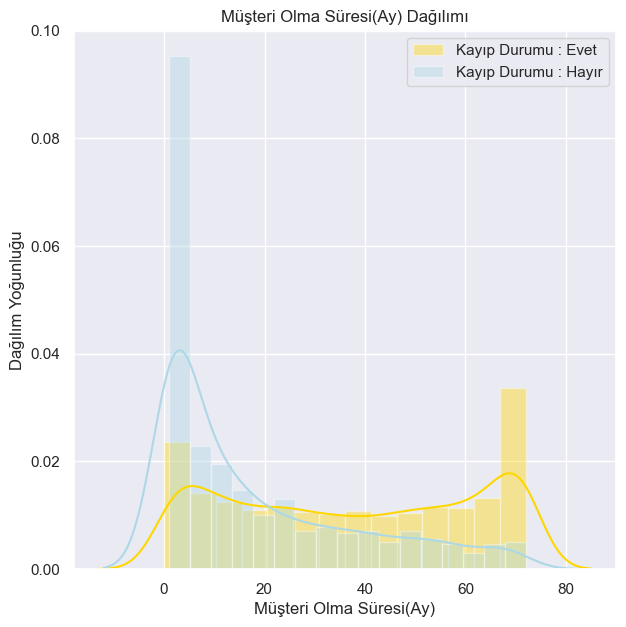

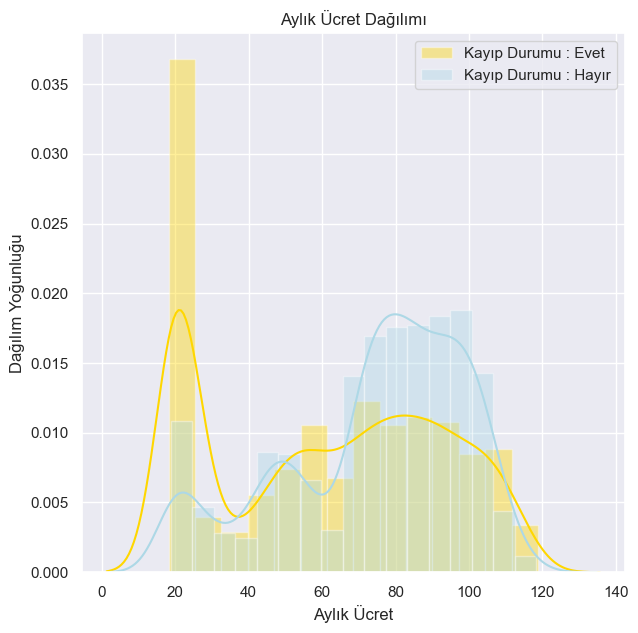

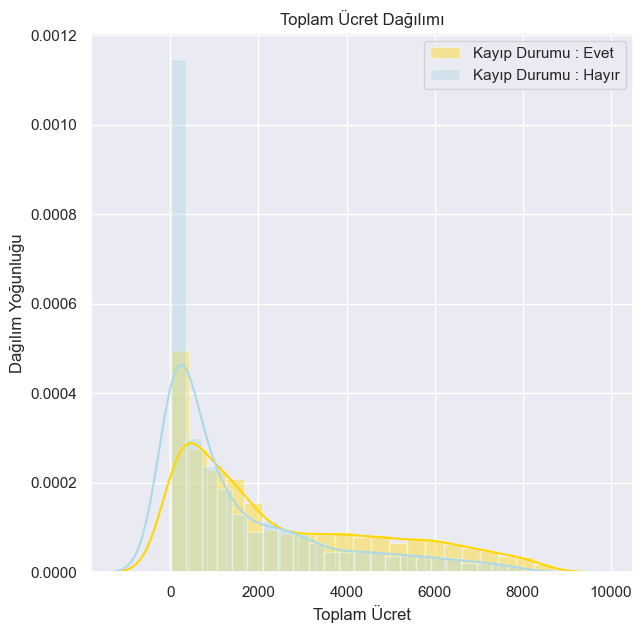

In [49]:
plot_distribution('Müşteri Olma Süresi(Ay)', bin_size=100)
plot_distribution('Aylık Ücret', bin_size=100)
plot_distribution('Toplam Ücret', bin_size=100)

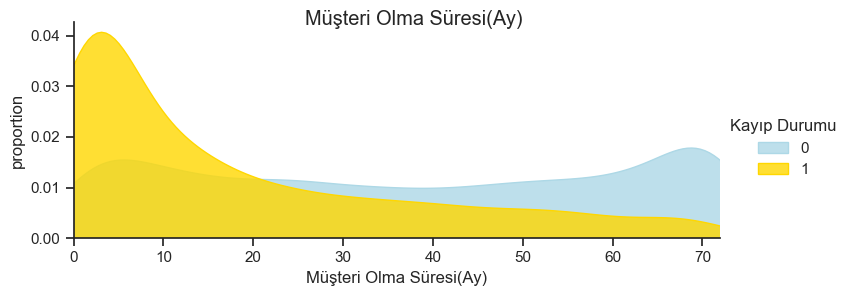

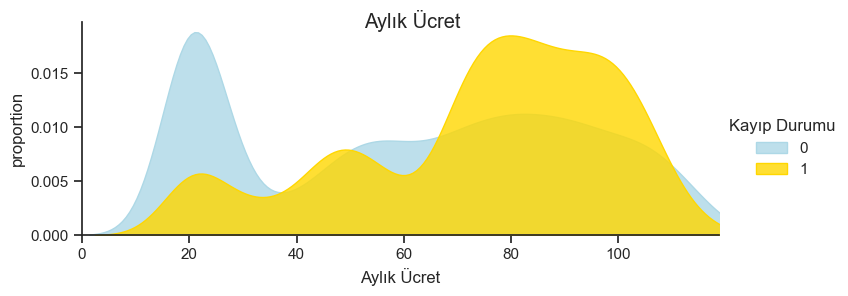

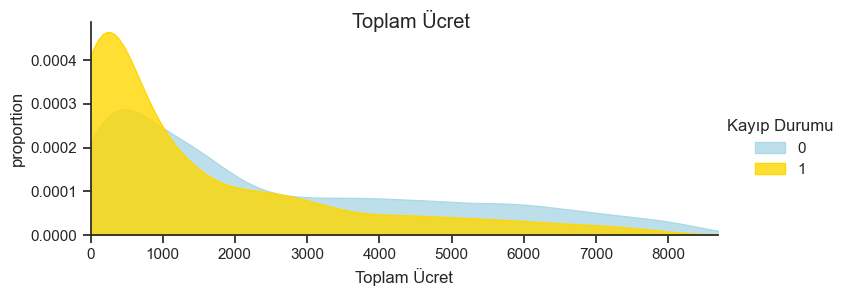

In [50]:
plot_distribution_num('Müşteri Olma Süresi(Ay)')
plot_distribution_num('Aylık Ücret')
plot_distribution_num('Toplam Ücret')

Numeric

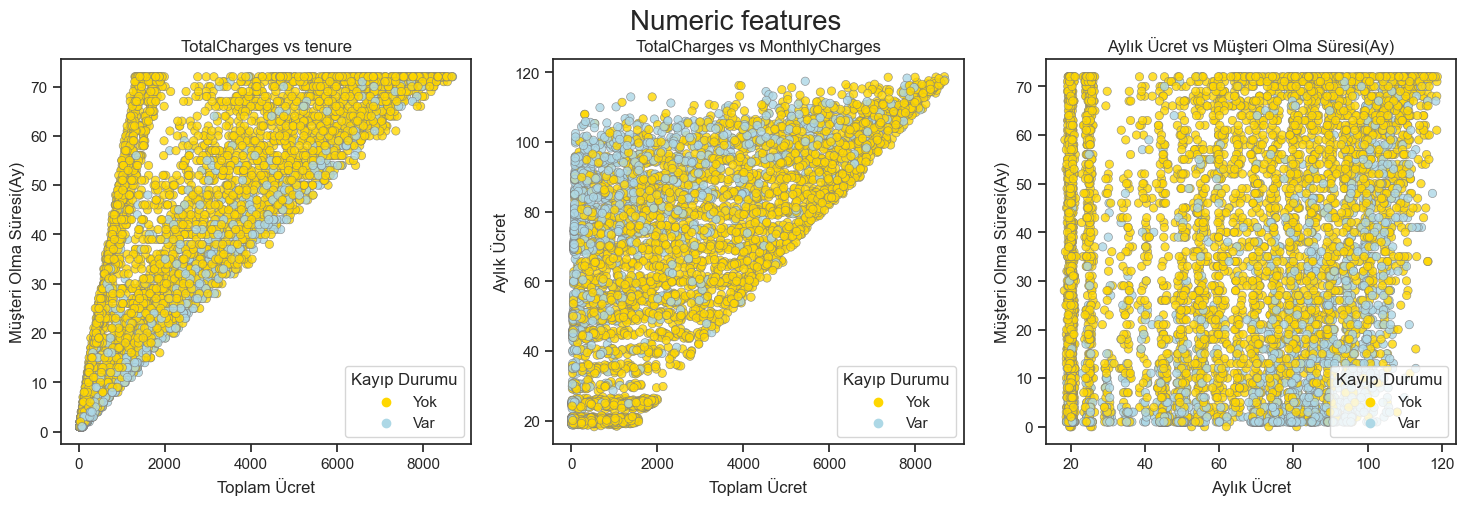

In [51]:
palette ={"Var" : 'lightblue', "Yok" : 'gold'}
edgecolor = 'grey'
fig = plt.figure(figsize=(18,5))
alpha = 0.8

plt.subplot(131)
ax1 = sns.scatterplot(x = df['Toplam Ücret'], y = df['Müşteri Olma Süresi(Ay)'], hue = "Kayıp Durumu",
                    data = df, palette = palette, edgecolor=edgecolor, alpha = alpha)
plt.title('TotalCharges vs tenure')

plt.subplot(132)
ax2 = sns.scatterplot(x = df['Toplam Ücret'], y = df['Aylık Ücret'], hue = "Kayıp Durumu",
                    data = df, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(133)
ax2 = sns.scatterplot(x = df['Aylık Ücret'], y = df['Müşteri Olma Süresi(Ay)'], hue = "Kayıp Durumu",
                    data = df, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('Aylık Ücret vs Müşteri Olma Süresi(Ay)')

fig.suptitle('Numeric features', fontsize = 20)
plt.savefig(r"D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\Nümerik Değişkenlerin Dağılımları")
plt.show()

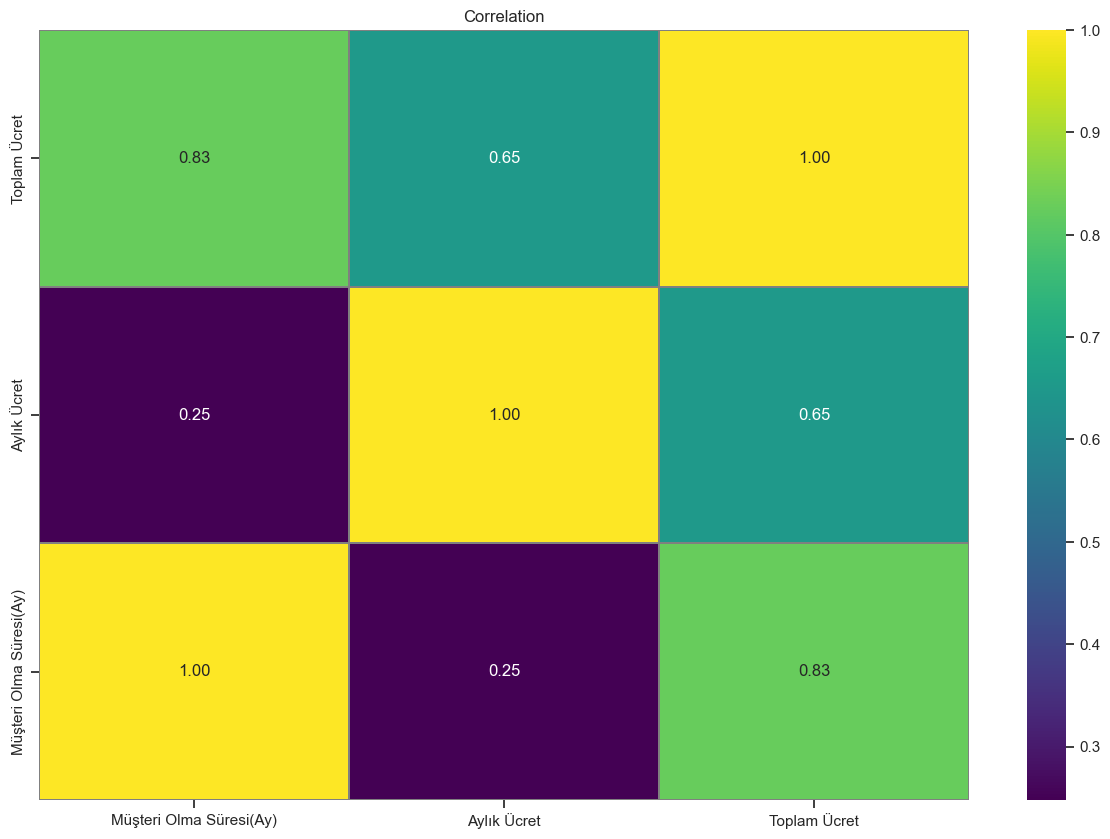

In [52]:
df_quant = df.select_dtypes(exclude=[object])
df_quant.head()
corr_quant = df_quant.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_quant, annot=True, cmap = 'viridis', linewidths = .1, linecolor = 'grey', fmt=".2f")
ax.invert_yaxis()
ax.set_title("Correlation")
plt.savefig("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\KorelasyonMatrisi.png")
plt.show()

In [53]:
barplot('Cinsiyet', True)

In [54]:
barplot('65 Yaş Üstü', True)

In [55]:
barplot('Bakma Sorumluluğu', True)

In [56]:
barplot('Ev Telefonu Aboneliği', True)

In [57]:
barplot('Birden Fazla Abonelik Durumu', True)

In [58]:
barplot('İnternet Aboneliği', True)

In [59]:
barplot('Güvenlik Hizmeti Aboneliği', True)

In [60]:
barplot('Medeni Durum', True)

In [61]:
barplot('Yedekleme Hizmeti Aboneliği', True)

In [62]:
barplot('Ekipman Güvenlik Aboneliği', True)

In [63]:
barplot('Teknik Destek Aboneliği', True)

In [64]:
barplot('IP Tv Aboneliği', True)

In [65]:
barplot('Film Abonelği', True)

In [66]:
barplot('Sözleşme Süresi', True)

In [67]:
barplot('Online Fatura(Kağıtsız)', True)

In [68]:
barplot('Ödeme Şekli', True)

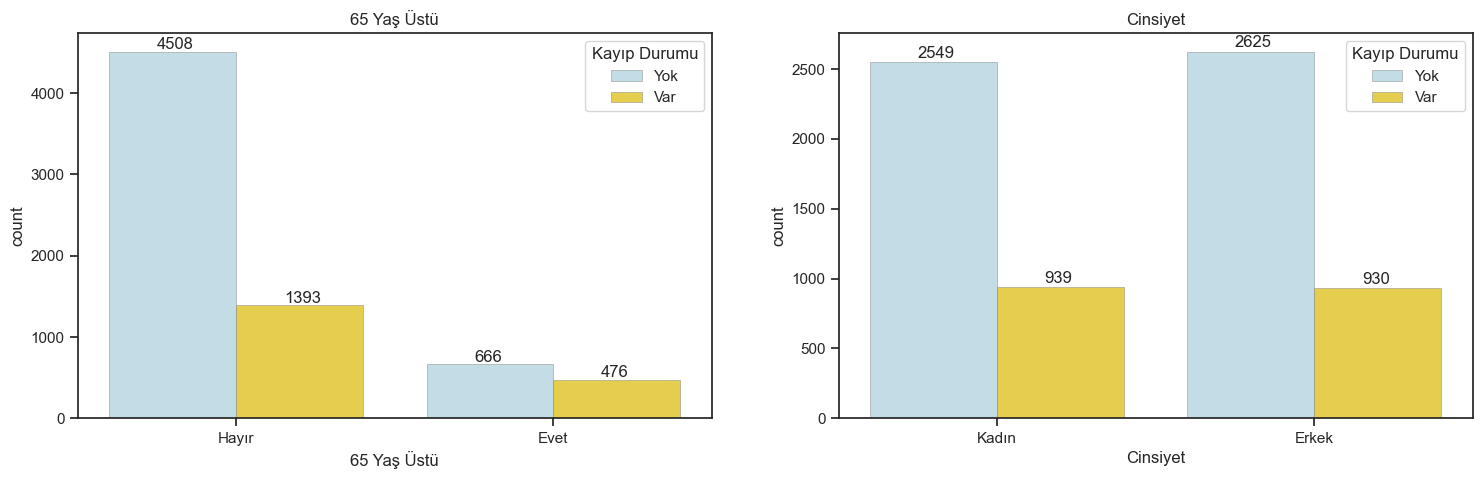

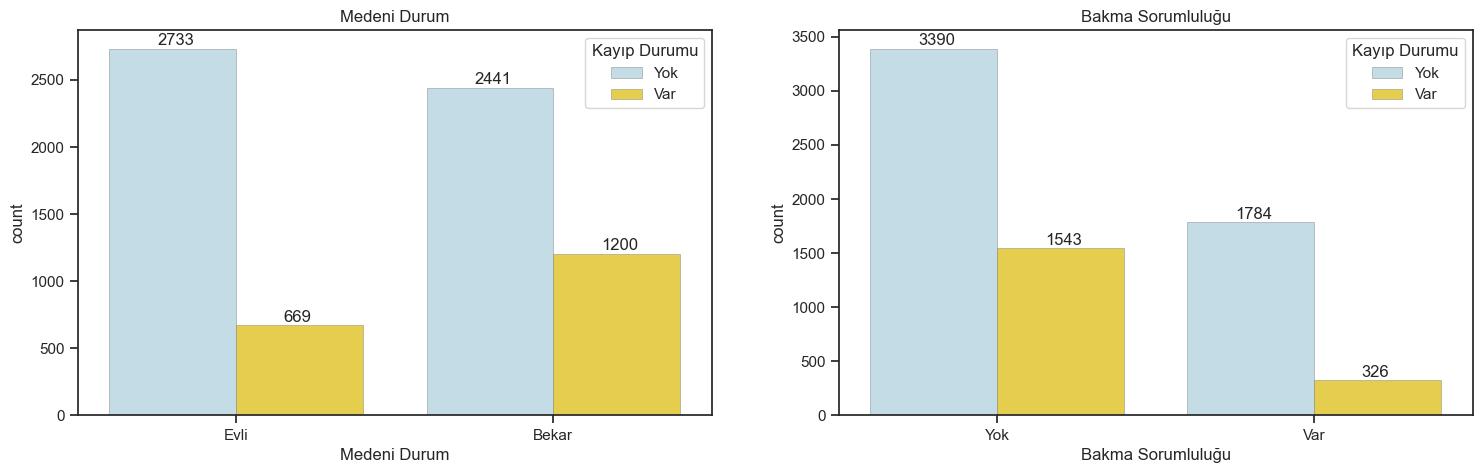

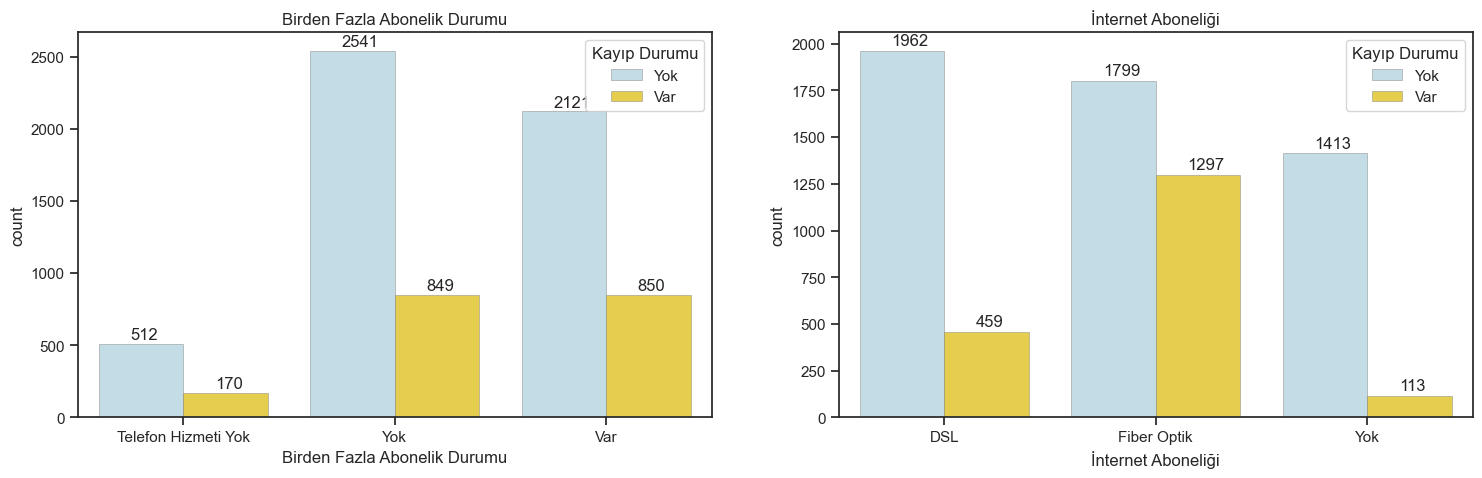

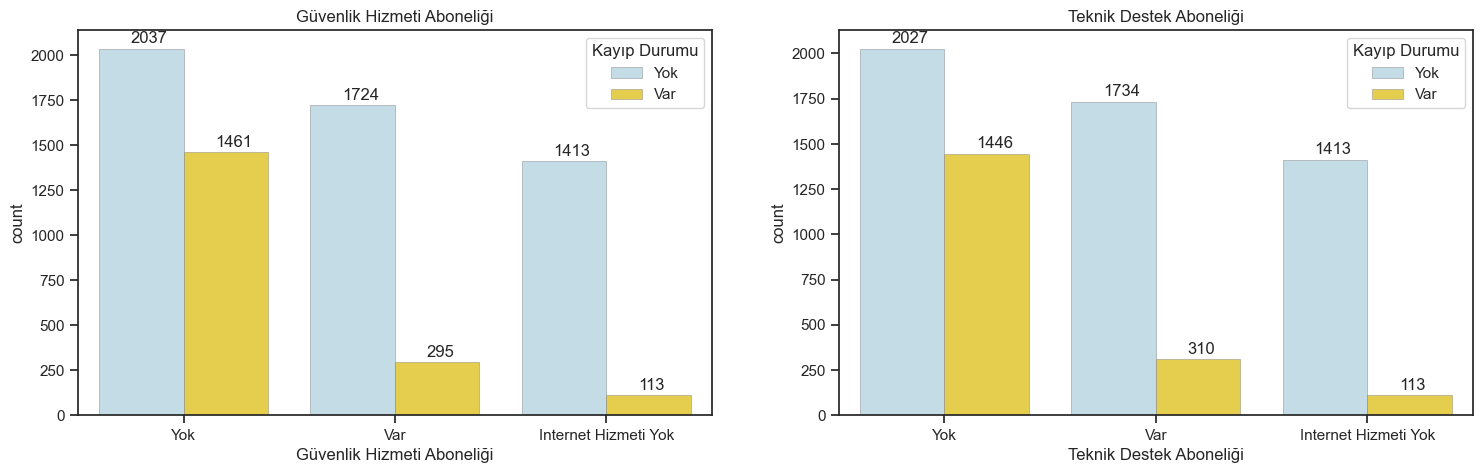

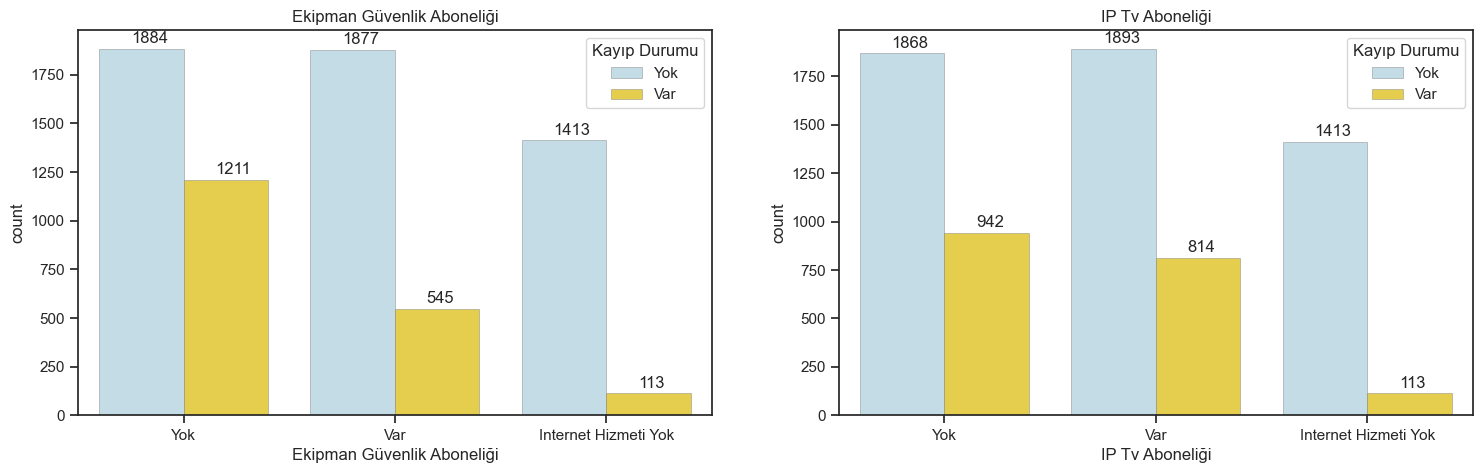

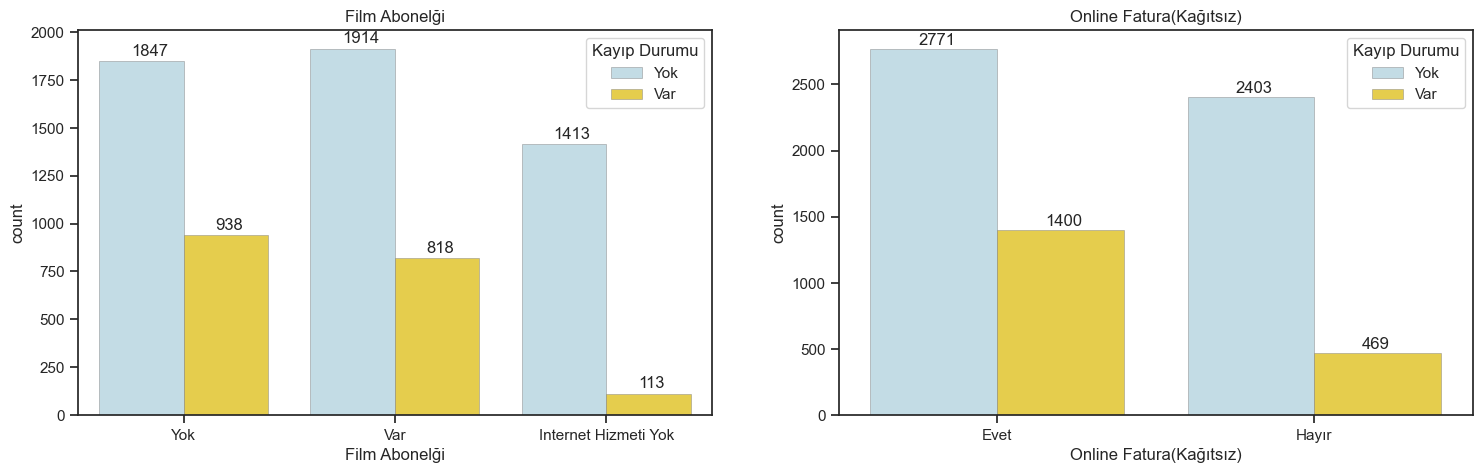

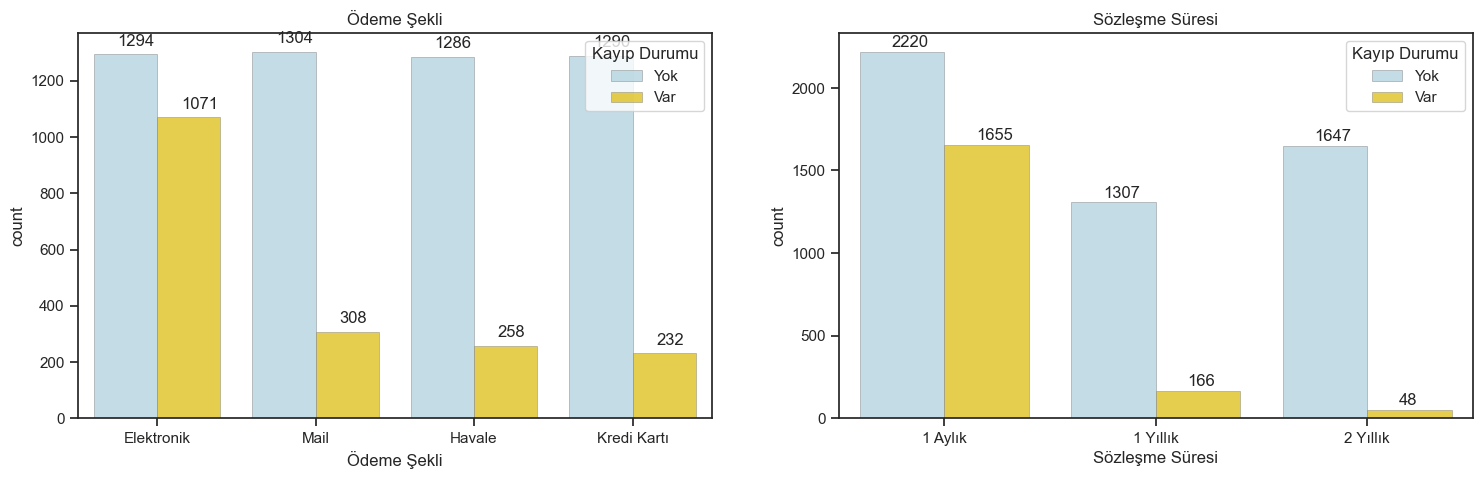

In [69]:
plot_distribution_cat('65 Yaş Üstü', 'Cinsiyet', df)
plot_distribution_cat('Medeni Durum', 'Bakma Sorumluluğu', df)
plot_distribution_cat('Birden Fazla Abonelik Durumu', 'İnternet Aboneliği', df)
plot_distribution_cat('Güvenlik Hizmeti Aboneliği', 'Teknik Destek Aboneliği', df)
plot_distribution_cat('Ekipman Güvenlik Aboneliği', 'IP Tv Aboneliği',df)
plot_distribution_cat('Film Abonelği', 'Online Fatura(Kağıtsız)',df)
plot_distribution_cat('Ödeme Şekli', 'Sözleşme Süresi',df)